<span style="font-size:2em;">**Kaggle Red Wine Quality Dataset**</span>

The Red Wine Quality dataset contains information about various physicochemical properties of wines. Each wine has a quality label associated with it, which is in the range of 0 to 10.

This dataset only has numeric variables:

- **fixed acidity:** It has a strong effect on the wine's flavor. A significant reduction in acids can lead to wines that taste flat. Fixed acids include tartaric, malic, citric, and succinic acids which are found in grapes (except succinic). It is measured in g/dm3.
- **volatile acidity:** These acids are to be distilled out from the wine before completing the production process. It is primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Excess of volatile acids are undesirable and lead to unpleasant flavor. It is measured in g/dm3.
- **citric acid:** The amount of citric acid in wine, which most of it is usually consumed during the fermentation process . It acts as a preservative and small quantities can add 'freshness' and flavor to wines. It is measured in g/dm3.
- **residual sugar:** The amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. Wines with more than 45g/dm3 are considered sweet. It is measured in g/dm3.
- **chlorides:** The amount of salt in the wine.
- **free sulfur dioxide:** The amount of sulfur dioxide (SO2) in free form. They are also known as sulfites and too much of it is undesirable and gives a pungent odour. It is measured in g/dm3.
- **total sulfur dioxide:** The total amount of SO2 in the wine. This is mainly added to kill harmful bacteria and preserve quality and freshness. It is measured in mg/dm3.
- **density:** The density of the wine is close to that of water depending on the percentage of alcohol and sugar, i.e., sweeter wines have higher density. It is generally used as a measure of the conversion of sugar to alcohol.
- **pH:** Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).
- **sulphates:** The amount of potassium sulphate in the wine. These are mineral salts containing sulfur. It is an additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. They are connected to the fermentation process and affects the wine aroma and flavor. 
- **alcohol:** Alcohol is formed as a result of yeast converting sugar during the fermentation process. It's usually measured in % volume or alcohol by volume (ABV).
- **quality:** Ranged from 0 to 10. Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import skew
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

# Descriptive Statistics

In [2]:
df_wine = pd.read_csv('../data/raw/winequality-red.csv')
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Most wines have a lower density than water, which means they are not too sweet.

All wines have a pH less than or equal to 4.01, so they are acidic.

75% of the wines have less than 11.1 of alcohol and the wine with more alcohol has 14.9.

Quality goes from 3 to 8 and the mean is 5.64.

In [5]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset.

# Data Visualization

**What is the proportion of each quality level?**

Let's look at this using a pie chart. A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportion. Pie charts are an alternative to bar charts, although most experts believe pie charts are less visually informative.

In [6]:
quality = df_wine["quality"].value_counts().sort_index(ascending=True)

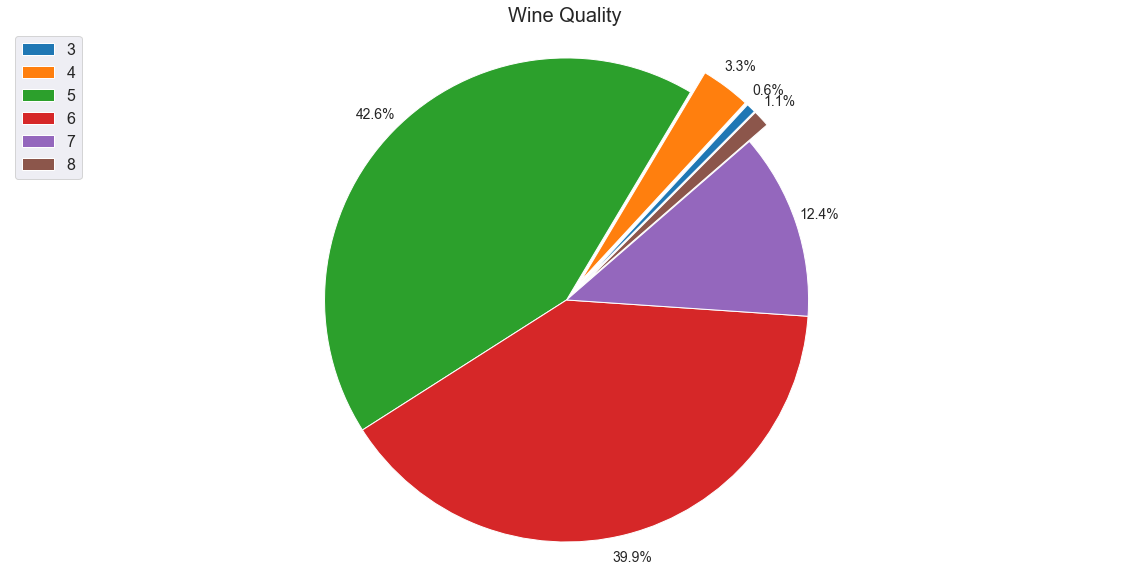

In [7]:
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16);

82.5% of the wines have an average quality (5 or 6).

**How is alcohol concentration distributed?**

We're going to visualize this with a density plot. A density plot shows the distribution of data values as a continuous line, it can be thought as a smoothed histogram. It is typically computed directly from the data through a kernel density estimate.

A density plot corresponds to plotting the histogram as a proportion rather than counts. The total area under the density curve is 1, and instead of counts in bins you calculate the areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

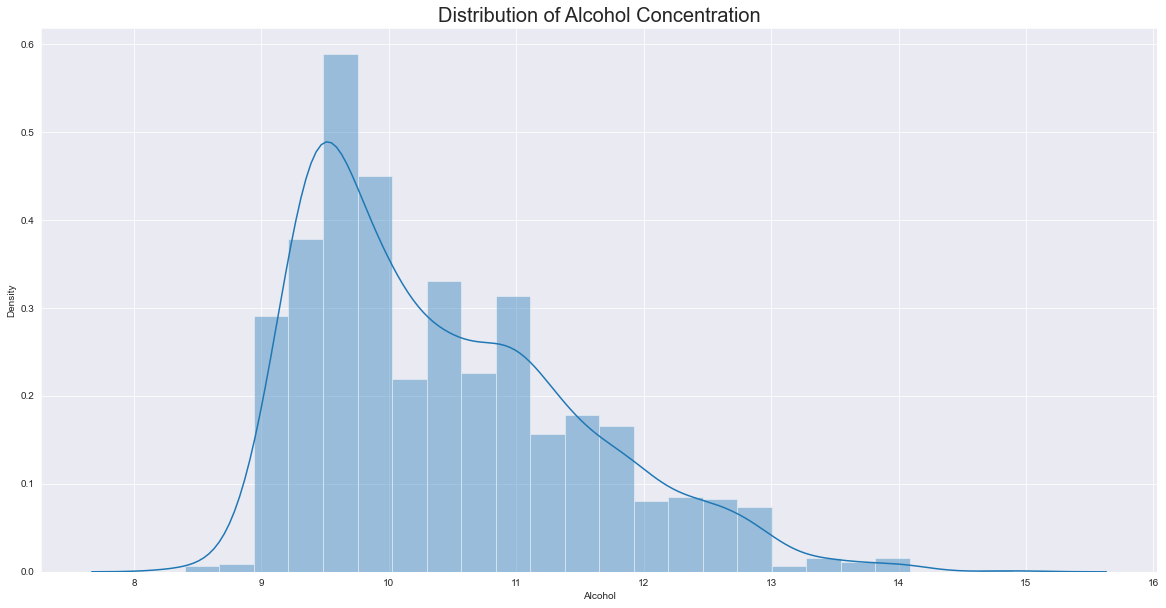

In [8]:
plt.figure(figsize=(20,10))
ax = sns.distplot(df_wine['alcohol'])
ax.set_title('Distribution of Alcohol Concentration', size=20)
ax.set(ylabel='Density', xlabel='Alcohol');

The alcohol distribution is positively skewed. Let's check this using the **skew** method.

In [9]:
print(f"Alcohol skew: {skew(df_wine['alcohol'])}")

Alcohol skew: 0.8600210646566755


**Let's have a look at the distribution of other features.**

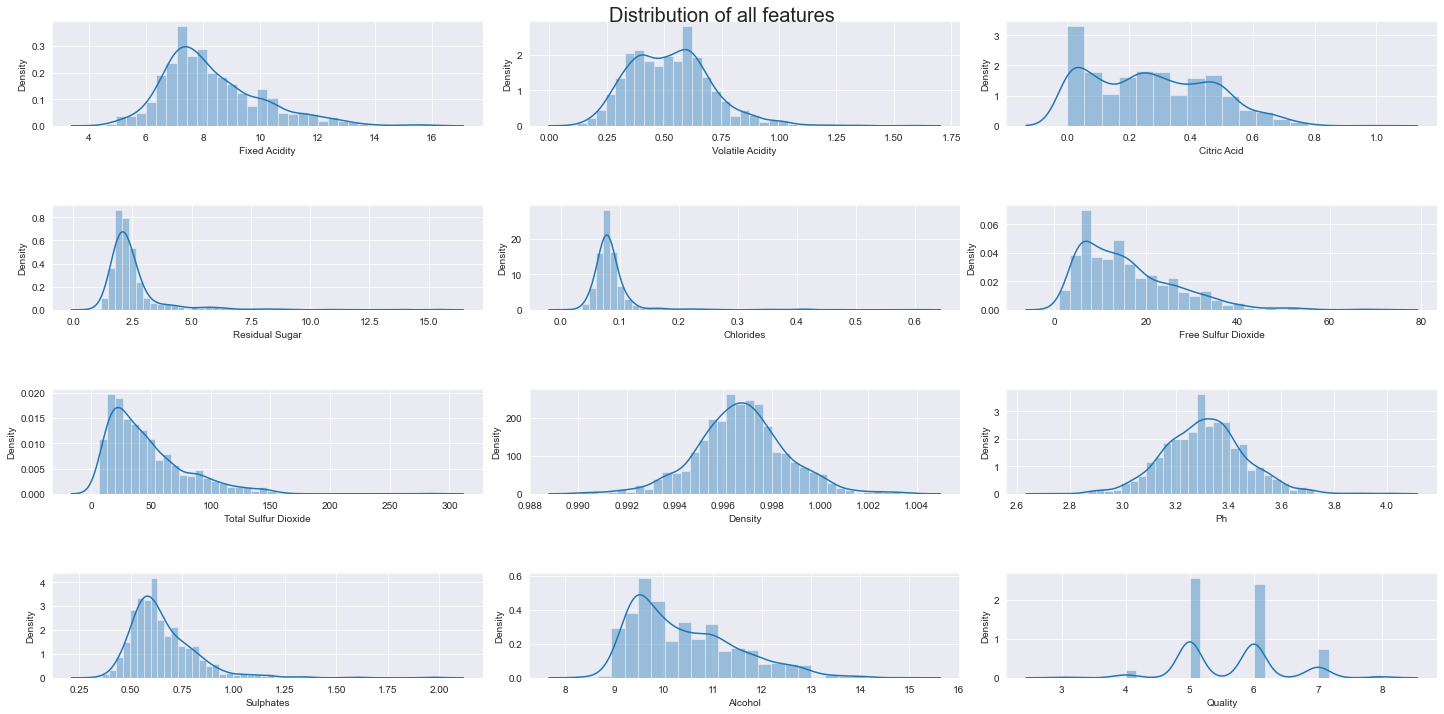

In [10]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_wine.items():
    sns.distplot(value, ax=ax[index])
    ax[index].set(xlabel=col.title(), ylabel="Density")
    index += 1
fig.suptitle("Distribution of all features", fontsize=20)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

A few features are normally distributed while others are rightly skewed.

**Which wine characteristics are related?**

The best way to visualize this is by using a heatmap. A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

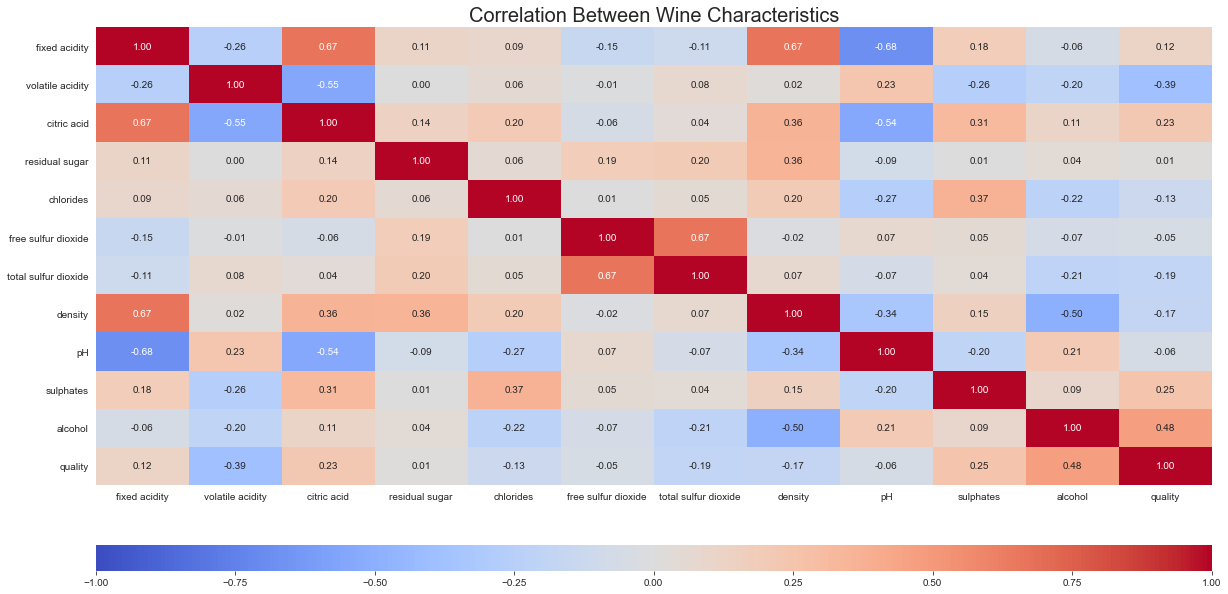

In [11]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(df_wine.corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('Correlation Between Wine Characteristics', size = 20);

* Positive correlations (>= 0.25):
    - Fixed acidity - Citric acid
    - Fixed acidity - Density
    - Citric acid - Density
    - Citric acid - Sulphates
    - Residual sugar - Density
    - Chlorides - Sulphates
    - Free sulfur dioxide - Total sulfur dioxide
    - Sulphates - Quality
    - Alchohol - Quality


* Negative correlations (<= -0.25):
    - Fixed acidity - Volatile acidity
    - Fixed acidity - pH
    - Volatile acidity - Citric acid
    - Volatile acidity - Sulphates
    - Volatile acidity - Quality
    - Citric acid - pH
    - Chlorides - pH
    - Density - pH
    - Density - Alcohol

**Hypothesis:**
 - Sulphates and alcohol have positive influence in the quality
 - Volatile acidity has negative influence in the quality

**Hypothesis check: Alcohol has positive influence in the quality**

Violin plot is the next type of plot we will use. A violin plot is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over and the resulting shape is filled in. The advantage of this plot is that it can show nuances in the distributions that aren't perceptible in a boxplot. On the other hand, the boxplot shows more clearly  the outliers in the data. 

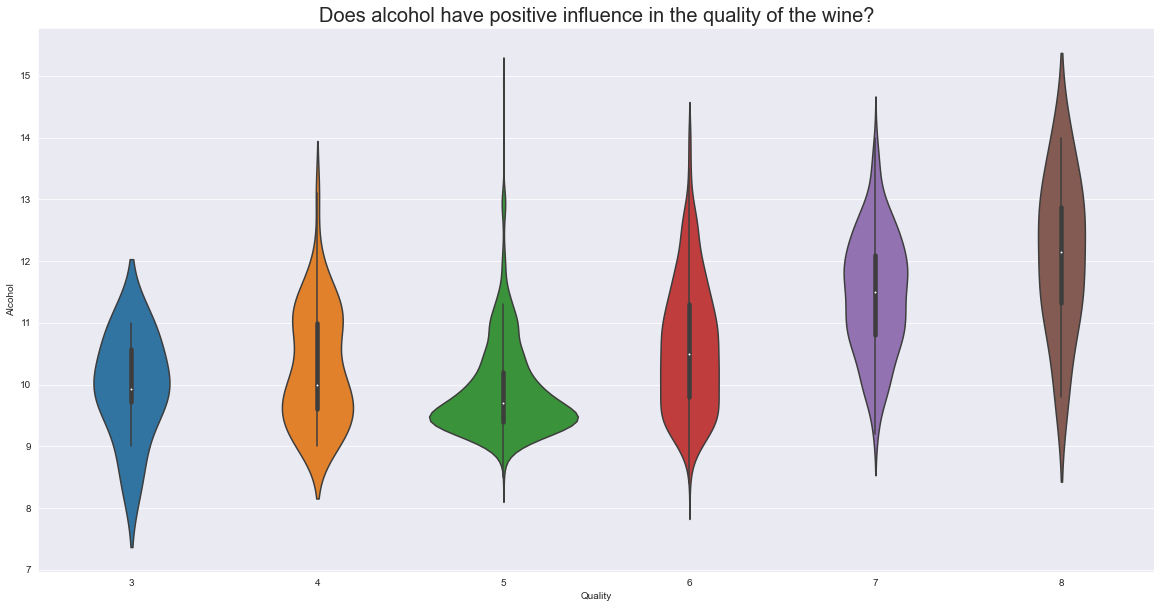

In [12]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='quality', y='alcohol', data = df_wine)
ax.set_title("Does alcohol have positive influence in the quality of the wine?", size = 20)
ax.set(xlabel="Quality", ylabel="Alcohol");

This hypothesis remains true, the higher the alcohol concentration is, the higher the quality of the wine.

**Hypothesis check: Sulphates have positive influence in the quality**

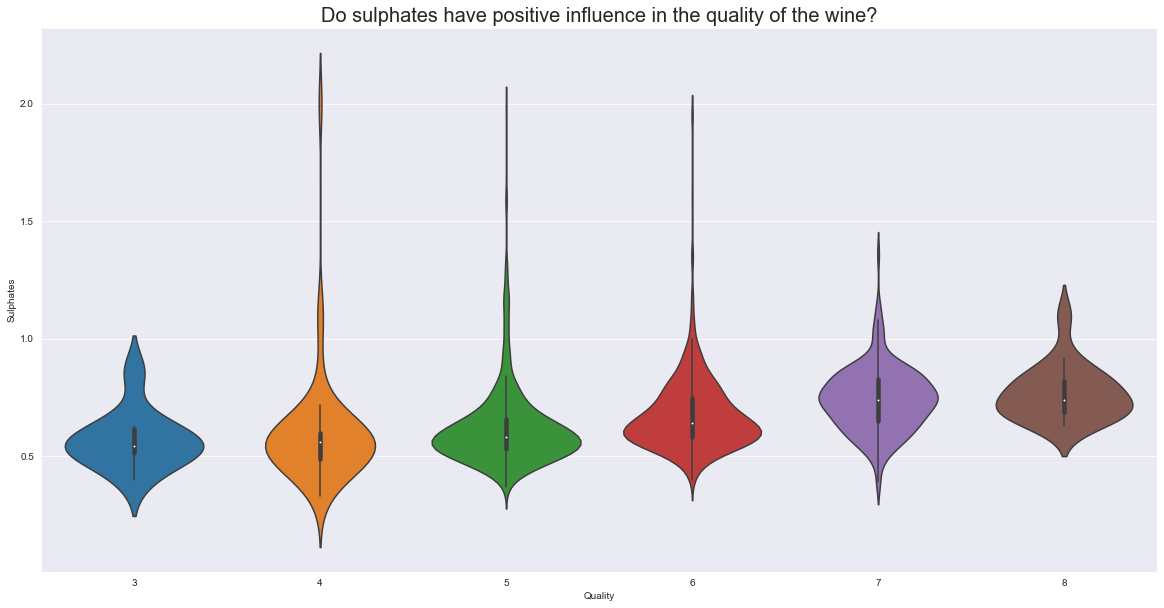

In [13]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='quality', y='sulphates', data = df_wine)
ax.set_title("Do sulphates have positive influence in the quality of the wine?", size = 20)
ax.set(xlabel="Quality", ylabel="Sulphates");

This hypothesis remains true, the higher the concentration of sulphates is, the higher the quality of the wine.

**Hypothesis check: Volatile acidity has negative influence in the quality**

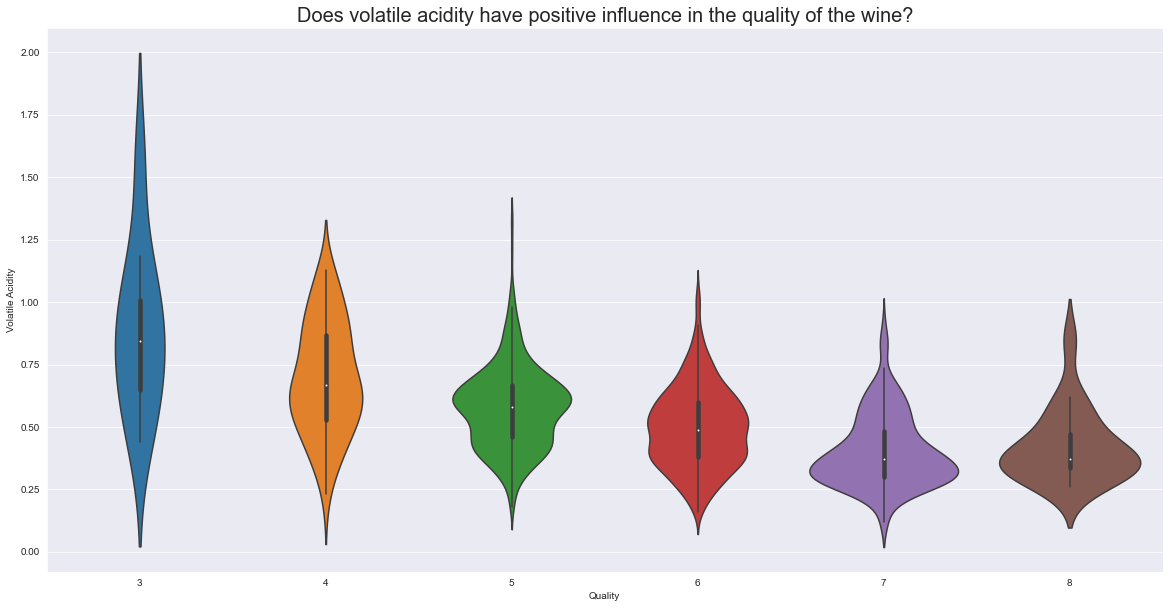

In [14]:
plt.figure(figsize=(20,10))
ax = sns.violinplot(x='quality', y='volatile acidity', data = df_wine)
ax.set_title("Does volatile acidity have positive influence in the quality of the wine?", size = 20)
ax.set(xlabel="Quality", ylabel="Volatile Acidity");

This hypothesis remains true, the higher the volatile acidity, the lower the quality of the wine.

**How do sulphates and alcohol influence the quality of a wine?**

Let's analyze this with a scatter plot. A scatter plot is a type of plot that displays values pertaining to typically two variables against each other. Usually it is a dependent variable to be plotted against an independent variable in order to determine if any correlation between the two variables exists. If color-coded, it can also show the relationship with a third categorical variable.

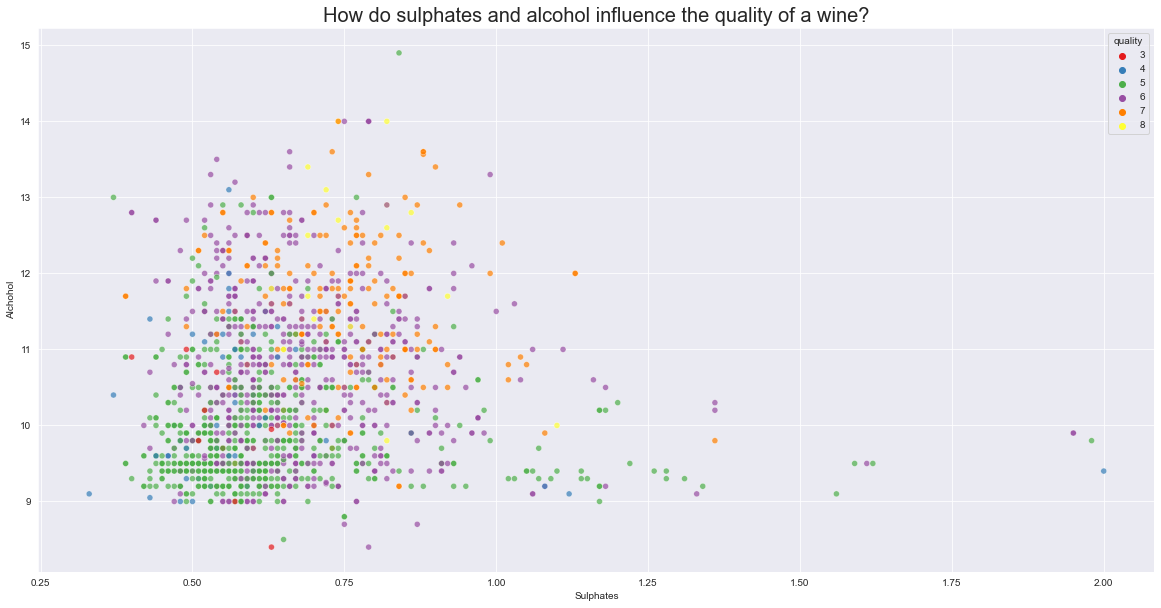

In [15]:
plt.figure(figsize = (20,10))
ax = sns.scatterplot(x = "sulphates", y = "alcohol", hue = "quality",data = df_wine, alpha = 0.7, palette = "Set1")
ax.set_title("How do sulphates and alcohol influence the quality of a wine?", size = 20)
ax.set(xlabel="Sulphates", ylabel="Alchohol");

Let's look at each of the quality levels separately.

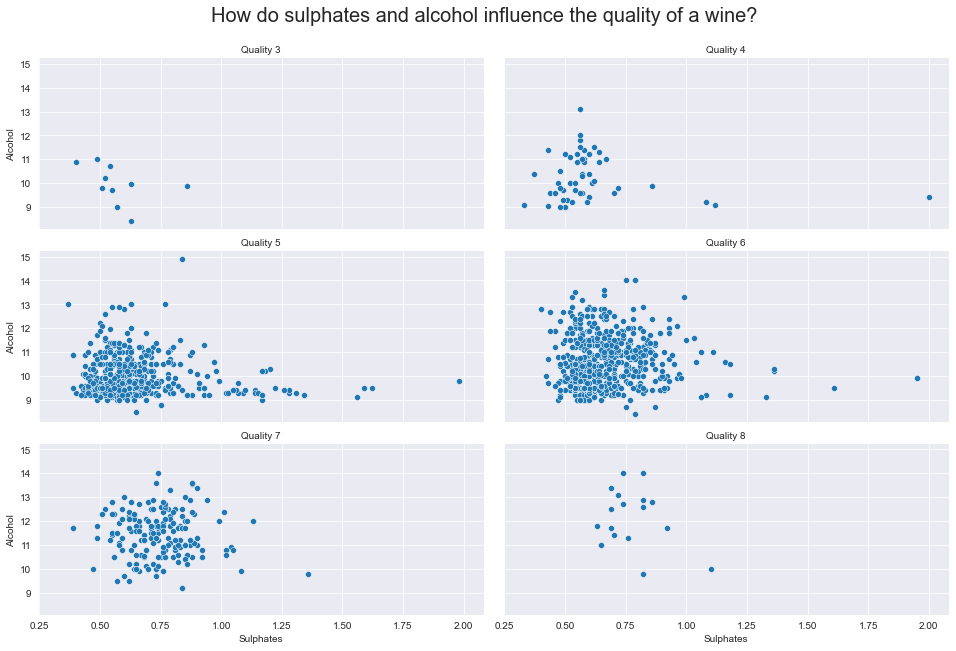

In [16]:
g = sns.FacetGrid(df_wine, col="quality", col_wrap=2, aspect=2.2)
g.map_dataframe(sns.scatterplot, x = "sulphates", y = "alcohol")
g.set_axis_labels("Sulphates", "Alcohol")
g.set_titles("Quality {col_name:d}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("How do sulphates and alcohol influence the quality of a wine?", size=20);

Most of the good wines have an alcohol concentration above 11 and sulphates between 0.5 and 1.

**How do volatile acidity and alcohol influence the quality of a wine?**

Boxplots are a good way to look at these relationships. Boxplots compare the distributions of a numeric variable grouped according to a categorical variable.

A boxplot is a way of statistically representing the distribution of given data through 5 main dimensions. The first dimension is the minimum, and its value can be obtained by subtracting 1.5 times the IQR, where IQR is the interquartile range from the first quartile. The second dimension is the first quartile which is 25% of the way through the sorted data. In other words, 1/4 of the data points are less than this value. The third dimension is the median. The fourth dimension is the third quartile, which is 75% through the sorted data. In other words, 3/4 of the data points are less than this value. And the final dimension is the maximum, which is the highest number in the sorted data where maximum equals the third quartile summed with 1.5 multiplied by IQR. Finally, boxplots also display outliers as individual dots that occur outside the upper and lower extremes.

In [17]:
Image(url='../reports/figures/boxplot_example.png', width=400, height=400)

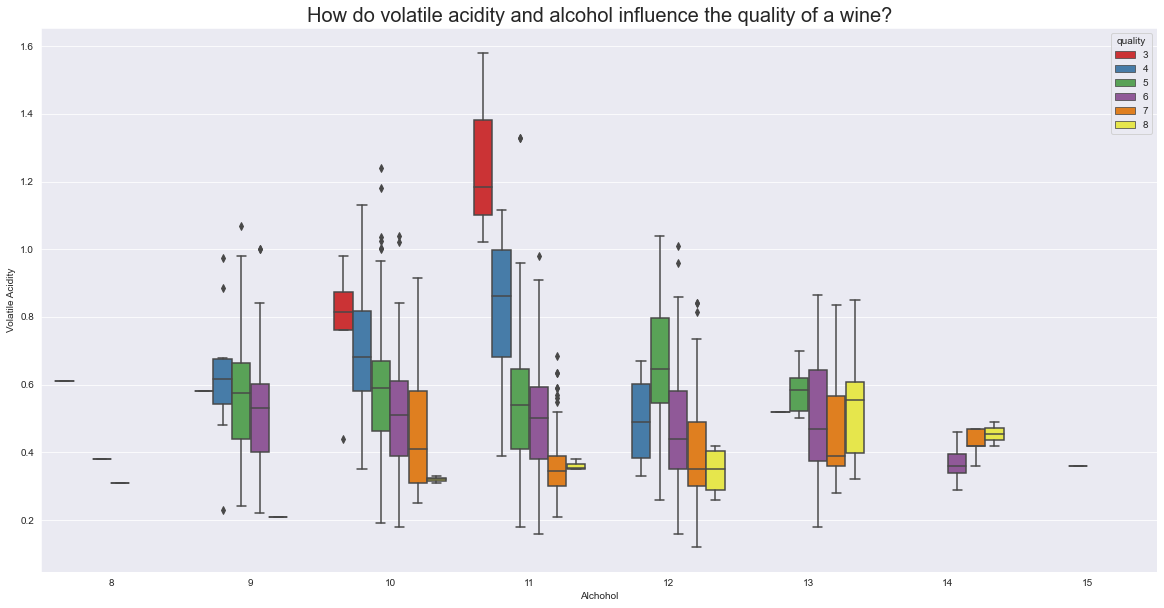

In [18]:
df_wine["alchohol_round"] = df_wine["alcohol"].apply(lambda x: round(x))

plt.figure(figsize = (20,10))
ax = sns.boxplot(x = "alchohol_round", y = "volatile acidity", hue = "quality",data = df_wine, palette = "Set1")
ax.set_title("How do volatile acidity and alcohol influence the quality of a wine?", size = 20)
ax.set(xlabel="Alchohol", ylabel="Volatile Acidity");

For alcohol concentration between 9% to 12%, the level of volatile acidity decreases as the alcohol increases. For higher alcohol content, it seems that the opposite happens. But we should take into account that there are few samples for this range of alcohol content. 

In [19]:
print(f"Percentage of wines with alchohol concentration above 12%: {round(len(df_wine[df_wine['alcohol']>12])/len(df_wine) * 100)}%")

Percentage of wines with alchohol concentration above 12%: 9%


**Let's take a look at another characteristics less correlated with quality.**

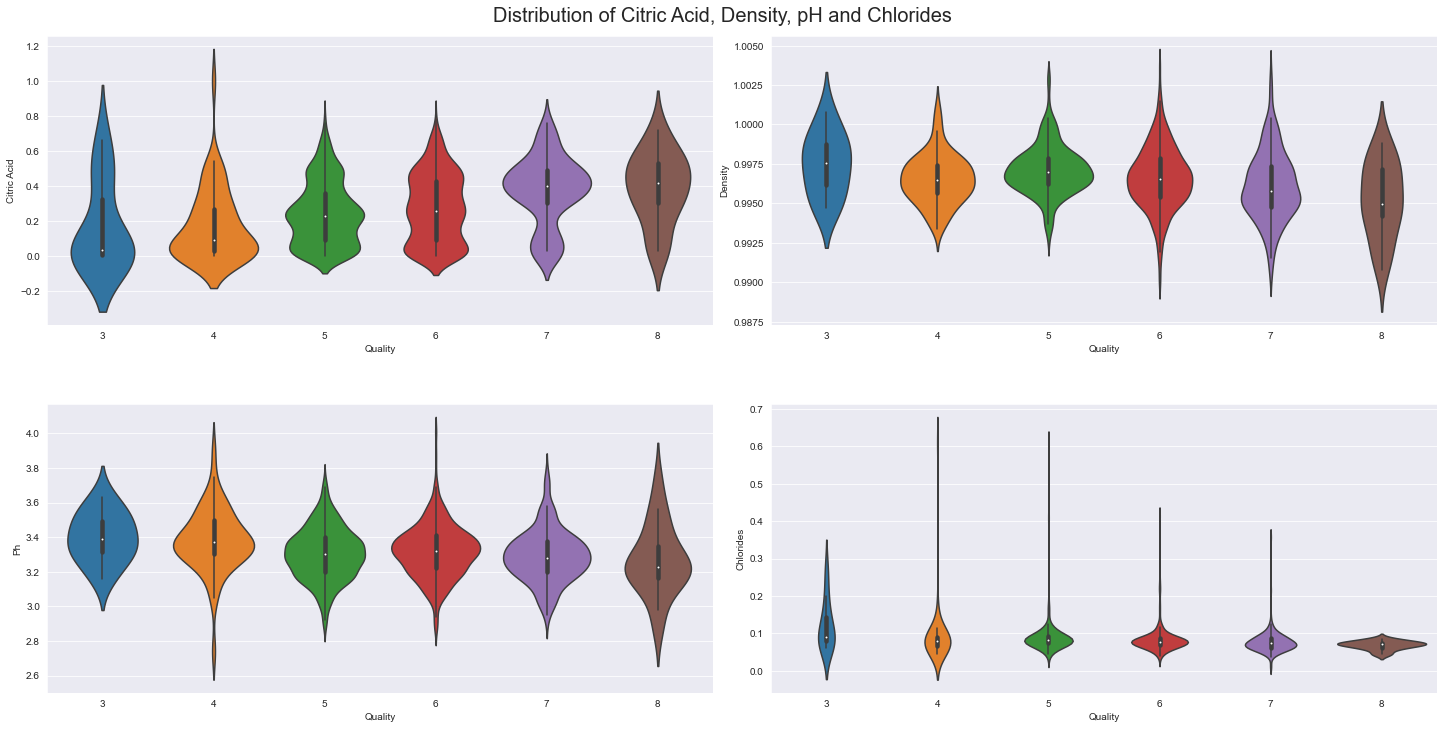

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in ["citric acid", "density", "pH", "chlorides"]:
    sns.violinplot(x='quality', y=col, data = df_wine, ax=ax[index])
    ax[index].set(xlabel="Quality", ylabel=col.title())
    index += 1
fig.suptitle("Distribution of Citric Acid, Density, pH and Chlorides", fontsize=20, y=1)
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

There is a positive relationship between quality and critic acid.

There are weak negative relationships between quality and density, pH and chlorides.

# References

1. [Red Wine Quality - Exploratory Data Analysis](https://www.kaggle.com/harshjain123/red-wine-quality-exploratory-data-analysis/notebook)
2. [Multi-dimensional Data Visualization | EDA](https://www.kaggle.com/piyushagni5/multi-dimensional-data-visualization-eda/notebook)
3. [Red Wine Quality EDA & Classification](https://www.kaggle.com/sercanyesiloz/red-wine-quality-eda-classification)
4. [Red Wine Quality Prediction Using Regression Modeling and Machine Learning](https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46)
5. [Practical Statistics for Data Scientists: 50 Essential Concepts](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/1491952962)